In [3]:
import pandas as pd
import numpy as np

In [4]:
#v5_0_old = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/OMIM_ROI/cor_phased.vcf.gz", compression="gzip", sep='\t', comment="#", names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "sample"])

#v5_0_new = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/WF_H_VAR_ROI/cor_phased.vcf.gz", compression="gzip", sep='\t', comment="#", names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "sample"])

v5_2_new = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/SUP_v5.2_ROI/cor_phased.vcf.gz", compression="gzip", sep='\t', comment="#", names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "sample"])

In [5]:
splitted = v5_2_new["sample"].str.split(":")
v5_2_new["GT"] = splitted.str[0]
v5_2_new["GQ"] = splitted.str[1]
v5_2_new["DP"] = splitted.str[2]
v5_2_new["AD"] = splitted.str[3]
v5_2_new["AF"] = splitted.str[4]
v5_2_new["PS"] = splitted.str[5]
v5_2_new["Cor_phased"] = splitted.str[6]
v5_2_new = v5_2_new[(v5_2_new["Cor_phased"].notna()) & (~v5_2_new["CHROM"].isin(["chrY", "chrX"])) & (v5_2_new["Cor_phased"] != "NA")].drop(["FORMAT","sample"],axis=1)
v5_2_new

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,DP,AD,AF,PS,Cor_phased
0,chr1,434272,.,A,C,10.63,PASS,F,0|1,10,31,"19,11",0.3548,413640,unknown
2,chr1,434287,.,G,A,13.04,PASS,F,1|0,13,31,"17,12",0.3871,413640,unknown
3,chr1,434292,.,T,C,15.32,PASS,F,0|1,15,31,"17,13",0.4194,413640,unknown
4,chr1,434451,.,G,A,17.59,PASS,F,0|1,17,31,"18,13",0.4194,413640,unknown
5,chr1,434504,.,G,A,15.38,PASS,F,0|1,15,31,"19,12",0.3871,413640,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795667,chr22,50807830,.,A,C,59.28,PASS,F,0|1,59,53,"27,25",0.4717,49975387,unknown
3795669,chr22,50807990,.,A,AGGGGG,23.38,PASS,F,0|1,23,45,"25,10",0.2222,49975387,unknown
3795671,chr22,50808062,.,A,G,4.18,PASS,F,0|1,4,45,"19,10",0.2222,49975387,unknown
3795673,chr22,50808110,.,A,AG,21.03,PASS,F,0|1,21,45,"21,14",0.3111,49975387,unknown


In [ ]:
splitted = v5_0_new["sample"].str.split(":")
v5_0_new["GT"] = splitted.str[0]
v5_0_new["GQ"] = splitted.str[1]
v5_0_new["DP"] = splitted.str[2]
v5_0_new["AD"] = splitted.str[3]
v5_0_new["AF"] = splitted.str[4]
v5_0_new["PS"] = splitted.str[5]
v5_0_new["Cor_phased"] = splitted.str[6]
v5_0_new = v5_0_new[v5_0_new["Cor_phased"].notna() & v5_0_new["CHROM"].isin(["chrY", "chrX"]) == False].drop(["FORMAT","sample"],axis=1)
v5_0_new

In [ ]:
splitted = v5_0_old["sample"].str.split(":")
v5_0_old["GT"] = splitted.str[0]
v5_0_old["GQ"] = splitted.str[1]
v5_0_old["DP"] = splitted.str[2]
v5_0_old["AD"] = splitted.str[3]
v5_0_old["AF"] = splitted.str[4]
v5_0_old["PS"] = splitted.str[5]
v5_0_old["Cor_phased"] = splitted.str[6]
v5_0_old = v5_0_old[v5_0_old["Cor_phased"].notna() & v5_0_old["CHROM"].isin(["chrY", "chrX"]) == False].drop(["FORMAT","sample"],axis=1)
v5_0_old

In [4]:
v5_2_new["Cor_phased"].unique()


array(['unknown', 'True', 'False', 'UNKNOWN'], dtype=object)

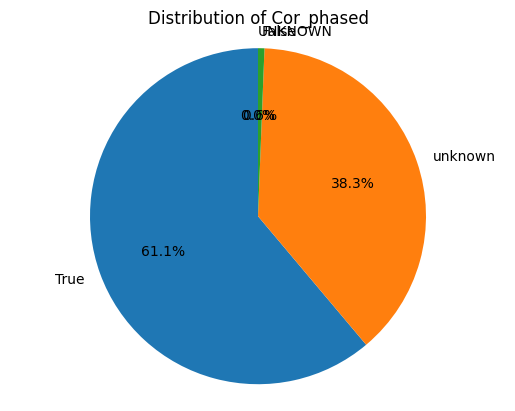

In [6]:
import matplotlib.pyplot as plt

counts = v5_2_new["Cor_phased"].value_counts()

plt.figure()
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Cor_phased")
plt.axis("equal")  # makes it a circle
plt.show()


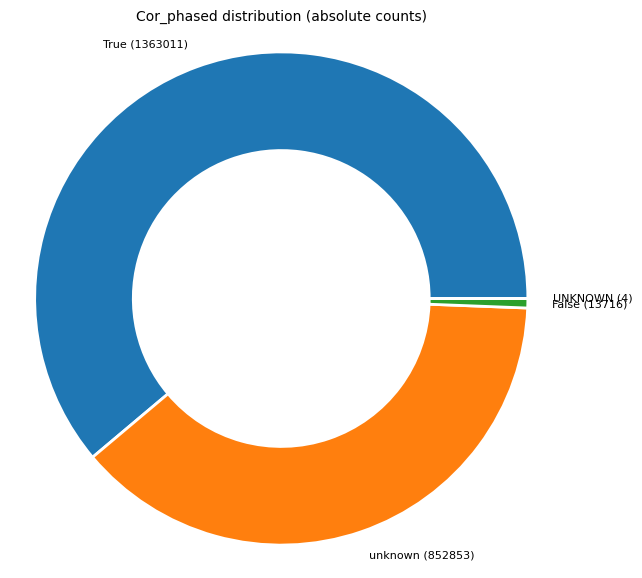

In [7]:
import matplotlib.pyplot as plt

# Count categories, keep NA explicit
counts = (
    v5_2_new["Cor_phased"]
    .fillna("NA")
    .value_counts()
)

labels = [f"{name} ({count})" for name, count in counts.items()]

plt.figure(figsize=(7, 7))

plt.pie(
    counts,
    labels=labels,
    startangle=0,
    textprops={"fontsize": 8},
    wedgeprops={
        "width": 0.4,        # donut thickness
        "edgecolor": "white",
        "linewidth": 2       # 👈 thickness of separating lines
    }
)

plt.title("Cor_phased distribution (absolute counts)", fontsize=10)
plt.axis("equal")
plt.show()


In [8]:
v5_2_new[v5_2_new["Cor_phased"] == "NA"]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,DP,AD,AF,PS,Cor_phased


In [9]:
v5_2_new[v5_2_new["PS"] == "131219081"].groupby("Cor_phased").agg(["count"])

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,DP,AD,AF,PS
,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Cor_phased,,,,,,,,,,,,,,
False,531,531,531,531,531,531,531,531,531,531,531,531,531,531
True,535,535,535,535,535,535,535,535,535,535,535,535,535,535
unknown,449,449,449,449,449,449,449,449,449,449,449,449,449,449


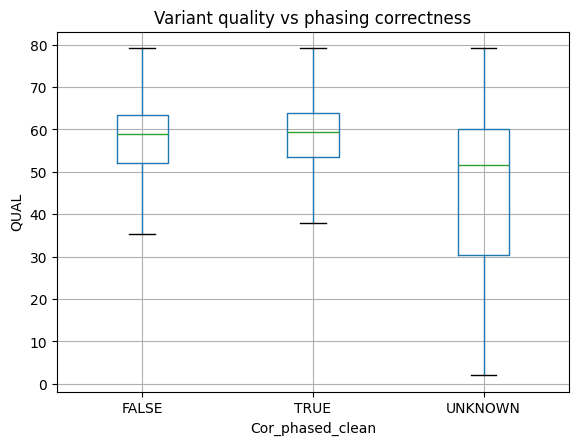

In [10]:
import matplotlib.pyplot as plt

v5_2_new["Cor_phased_clean"] = (
    v5_2_new["Cor_phased"]
    .str.upper()
    .replace({"UNKNOWN": "UNKNOWN"})
)

v5_2_new.boxplot(
    column="QUAL",
    by="Cor_phased_clean",
    showfliers=False
)

plt.ylabel("QUAL")
plt.title("Variant quality vs phasing correctness")
plt.suptitle("")  # removes automatic pandas title
plt.show()



In [11]:
v5_2_new.groupby("Cor_phased")["QUAL"].agg(["count", "mean"])

,count,mean
Cor_phased,,
False,13716,55.633236
True,1363011,56.704657
UNKNOWN,4,56.185000
unknown,852853,45.401419


<Figure size 640x480 with 0 Axes>

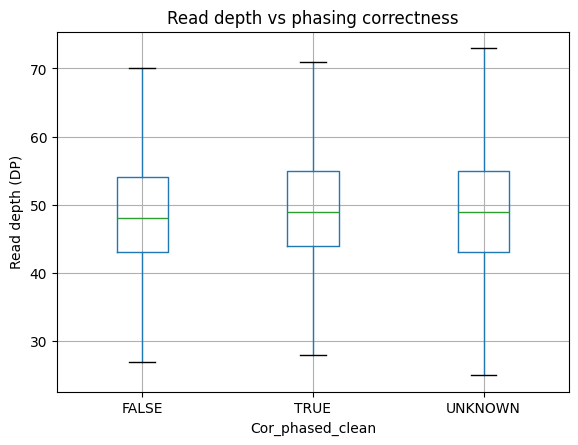

In [12]:
plt.figure()
v5_2_new["DP"] = pd.to_numeric(v5_2_new["DP"], errors="coerce")

v5_2_new.boxplot(
    column="DP",
    by="Cor_phased_clean",
    showfliers=False
)
plt.ylabel("Read depth (DP)")
plt.title("Read depth vs phasing correctness")
plt.suptitle("")
plt.show()


<Figure size 640x480 with 0 Axes>

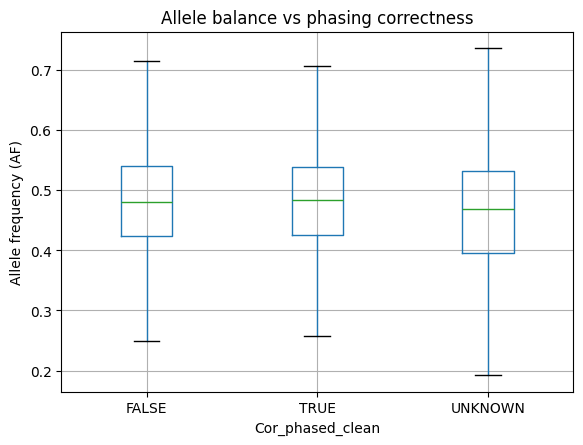

In [13]:
plt.figure()
v5_2_new["AF"] = pd.to_numeric(v5_2_new["AF"], errors="coerce")

v5_2_new.boxplot(
    column="AF",
    by="Cor_phased_clean",
    showfliers=False
)
plt.ylabel("Allele frequency (AF)")
plt.title("Allele balance vs phasing correctness")
plt.suptitle("")
plt.show()

In [17]:
v5_2_new["PS_tag"] = v5_2_new["CHROM"].astype(str) +"_"+ v5_2_new["PS"].astype(str)
v5_2_new

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,DP,AD,AF,PS,Cor_phased,Cor_phased_clean,PS_tag
0,chr1,434272,.,A,C,10.63,PASS,F,0|1,10,31,"19,11",0.3548,413640,unknown,UNKNOWN,chr1_413640
2,chr1,434287,.,G,A,13.04,PASS,F,1|0,13,31,"17,12",0.3871,413640,unknown,UNKNOWN,chr1_413640
3,chr1,434292,.,T,C,15.32,PASS,F,0|1,15,31,"17,13",0.4194,413640,unknown,UNKNOWN,chr1_413640
4,chr1,434451,.,G,A,17.59,PASS,F,0|1,17,31,"18,13",0.4194,413640,unknown,UNKNOWN,chr1_413640
5,chr1,434504,.,G,A,15.38,PASS,F,0|1,15,31,"19,12",0.3871,413640,unknown,UNKNOWN,chr1_413640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795667,chr22,50807830,.,A,C,59.28,PASS,F,0|1,59,53,"27,25",0.4717,49975387,unknown,UNKNOWN,chr22_49975387
3795669,chr22,50807990,.,A,AGGGGG,23.38,PASS,F,0|1,23,45,"25,10",0.2222,49975387,unknown,UNKNOWN,chr22_49975387
3795671,chr22,50808062,.,A,G,4.18,PASS,F,0|1,4,45,"19,10",0.2222,49975387,unknown,UNKNOWN,chr22_49975387
3795673,chr22,50808110,.,A,AG,21.03,PASS,F,0|1,21,45,"21,14",0.3111,49975387,unknown,UNKNOWN,chr22_49975387


In [14]:
TRU_FAL = v5_2_new[v5_2_new["Cor_phased"].isin(["False"])]

TRU_FAL.groupby("PS")["Cor_phased"].agg("count")

PS
100086706     15
10014843       1
100299084      1
100311269      1
100348894      1
            ... 
9740007      480
98375641       2
98666882       2
98911988       1
99562661       3
Name: Cor_phased, Length: 466, dtype: int64

In [25]:
v5_2_new[v5_2_new["PS"] == "9740007"]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GT,GQ,DP,AD,AF,PS,Cor_phased,Cor_phased_clean,var_type
2589335,chr12,9740007,.,A,G,61.31,PASS,F,0|1,61,56,"25,31",0.5536,9740007,False,FALSE,SNP
2589371,chr12,9750070,.,A,G,51.55,PASS,F,1|0,51,53,"33,20",0.3774,9740007,False,FALSE,SNP
2589372,chr12,9750261,.,C,T,61.18,PASS,F,1|0,61,54,"32,22",0.4074,9740007,False,FALSE,SNP
2589373,chr12,9751067,.,AT,A,61.53,PASS,F,0|1,61,56,"21,31",0.5536,9740007,False,FALSE,INDEL
2589374,chr12,9751478,.,C,A,25.55,PASS,P,0|1,25,54,"22,32",0.5926,9740007,False,FALSE,SNP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593883,chr12,11079212,.,C,T,42.71,PASS,F,0|1,42,29,"14,15",0.5172,9740007,unknown,UNKNOWN,SNP
2594046,chr12,11080743,.,T,G,26.53,PASS,P,0|1,26,24,"10,14",0.5833,9740007,unknown,UNKNOWN,SNP
2594263,chr12,11082646,.,C,A,14.86,PASS,F,0|1,14,22,"9,12",0.5455,9740007,unknown,UNKNOWN,SNP
2594440,chr12,11084442,.,C,G,20.89,PASS,F,0|1,20,22,"12,8",0.3636,9740007,unknown,UNKNOWN,SNP


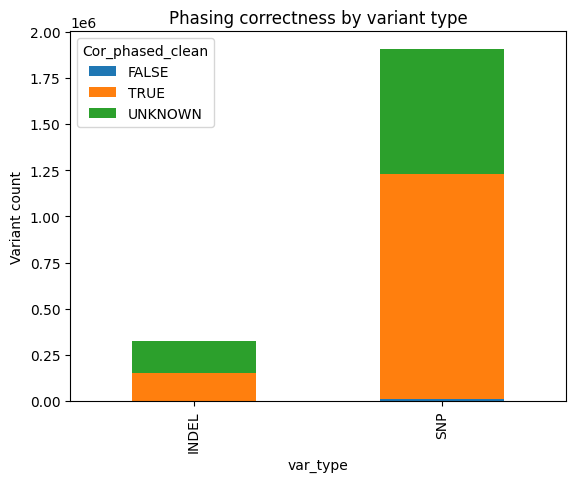

In [12]:
v5_2_new_FT = v5_2_new[v5_2_new["Cor_phased_clean"] != "UNKNOWN"]

v5_2_new["var_type"] = v5_2_new.apply(
    lambda r: "SNP" if len(r.REF) == 1 and len(r.ALT) == 1 else "INDEL",
    axis=1
)
ct = (
    v5_2_new
    .groupby(["var_type", "Cor_phased_clean"])
    .size()
    .unstack(fill_value=0)
)

ct.plot.bar(stacked=True)
plt.ylabel("Variant count")
plt.title("Phasing correctness by variant type")
plt.show()


In [ ]:
v5_2_new[v5_2_new["Cor_phased"] == "False"]

In [36]:
ct = v5_2_new.groupby(["var_type", "Cor_phased_clean"]).size().unstack(fill_value=0)


In [37]:
ct

Cor_phased_clean,FALSE,NA,TRUE,UNKNOWN
var_type,,,,
INDEL,1662,46680,147707,173882
SNP,11523,0,1214769,680041


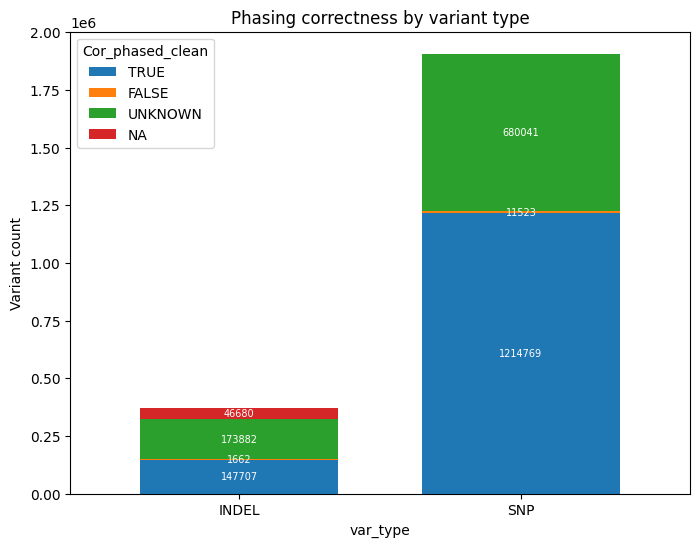

In [14]:
import matplotlib.pyplot as plt

# Keep the desired order for the columns
col_order = ["TRUE", "FALSE", "UNKNOWN", "NA"]

# Reorder columns in ct
ct = ct[col_order]

# Plot stacked bar
ax = ct.plot.bar(stacked=True, figsize=(8,6), width=0.7)

plt.ylabel("Variant count")
plt.title("Phasing correctness by variant type")
plt.xticks(rotation=0)

# Optional: add counts on top of each bar segment
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width()/2., p.get_y() + height/2),
                    ha='center', va='center', fontsize=7, color='white')

plt.show()
